In [1]:
import pandas as pd
import numpy as np
import random
import math
import gc
import matplotlib.pylab as plt
import networkx as nx
from time import time

In [2]:
nodes = 20

In [3]:
adjacency_matrix = np.zeros((nodes,nodes),dtype = np.int64)
adjacency_matrix.shape

(20, 20)

In [4]:
edges = []

edges.append((0, 1))
edges.append((0, 2))
edges.append((1, 3))
edges.append((1, 4))
edges.append((2, 8))
edges.append((2, 9))
edges.append((3, 5))
edges.append((3, 6))
edges.append((9, 10))
edges.append((9, 11))
edges.append((6, 7))
edges.append((11, 12))
edges.append((11, 13))
edges.append((12, 14))
edges.append((13, 15))
edges.append((13, 16))
edges.append((14, 17))
edges.append((14, 18))
edges.append((16, 19))


edges_cnt = len(edges)

for i, j in edges:
	adjacency_matrix[i, j] = 1

In [5]:
adjacency_matrix

array([[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
print(edges)
print("Number of edges {}".format(edges_cnt))

[(0, 1), (0, 2), (1, 3), (1, 4), (2, 8), (2, 9), (3, 5), (3, 6), (9, 10), (9, 11), (6, 7), (11, 12), (11, 13), (12, 14), (13, 15), (13, 16), (14, 17), (14, 18), (16, 19)]
Number of edges 19


In [7]:
G=nx.Graph()
G.add_nodes_from(list(range(0,nodes)))
G.add_edges_from(edges)

In [8]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos

            
    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

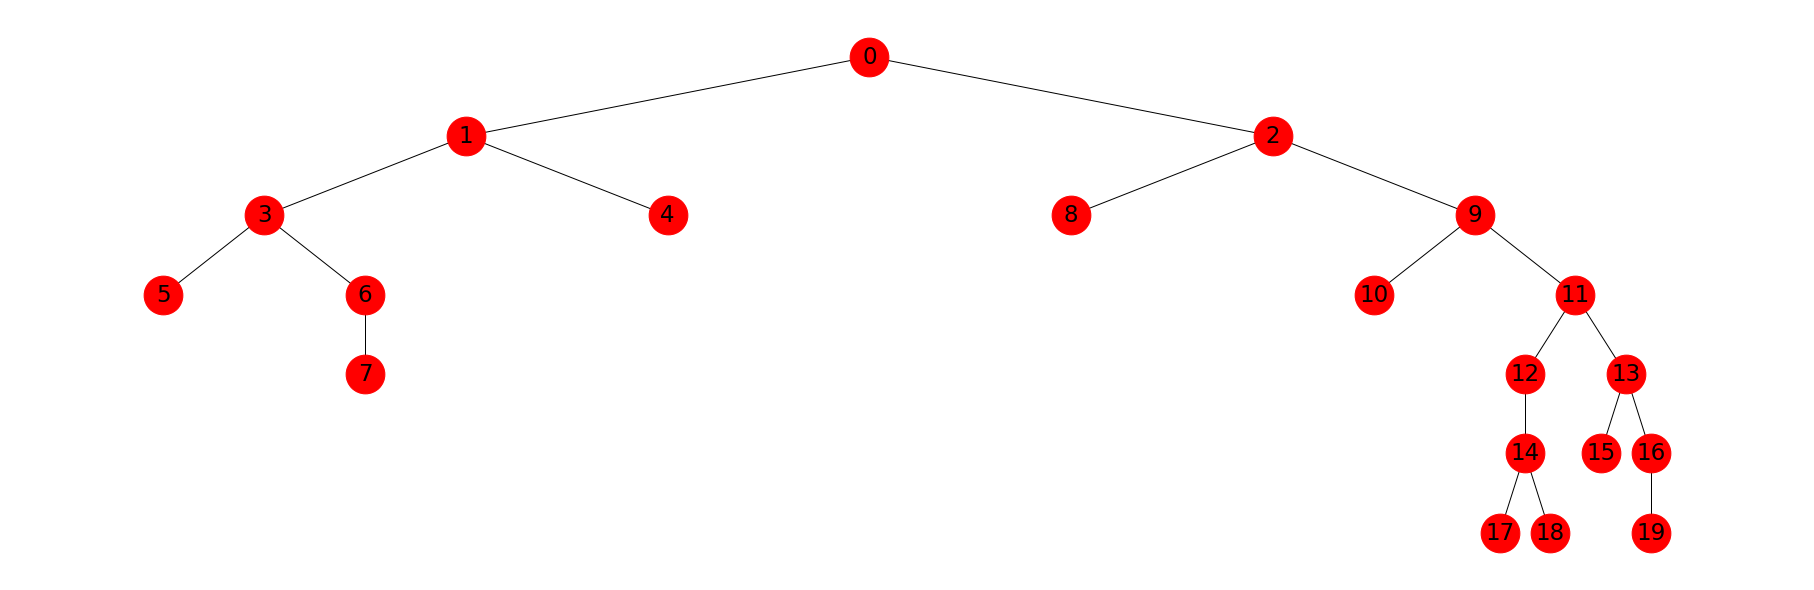

In [9]:
plt.figure(figsize=(25,8))
pos = hierarchy_pos(G, 0)
nx.draw(G, pos=pos, node_color='r',font_size=23, node_size=1500, alpha=1, with_labels=True)
plt.show() # display

In [10]:
#Vertex Cover Greedy Algorithm
visited = np.zeros(nodes)
cnt = 0
for e in edges:
    (u,v) = e
    if ((visited[u]==0) & (visited[v]==0)):
        print(u,v)
        visited[u] = 1
        visited[v] = 1
        cnt+=2

0 1
2 8
3 5
9 10
6 7
11 12
13 15
14 17
16 19


In [11]:
print("Vertex cover consists of {} nodes".format(cnt))

Vertex cover consists of 18 nodes


In [12]:
approximation_algo_result = cnt
approximation_algo_result

18

In [13]:
n = nodes
pop_total = int(50 * max(1,round(n/5.0))) # max population allowed in the environment
pop_init = int(20 * max(1,round(n/5.0))) # initial population
max_iterate = int(7 * max(1,round(n/5.0))) # max iterations or generations allowed

In [14]:
print("N = {}\nPopulation Total = {}\nPopulation Initial = {}\nMax Iteration = {}\n".format(n,pop_total, pop_init, max_iterate))

N = 20
Population Total = 200
Population Initial = 80
Max Iteration = 28



In [15]:
def chromosomes_gen(n,k,pop_init):
    lst = []
    for i in range(pop_init):
        chromosome = np.zeros(n,dtype= int)
        samples = random.sample(range(0,n), k = k)
        for j in range(k):
            chromosome[samples[j]] = 1
        lst.append(chromosome)
    return lst

In [16]:
def cost(cmbn,n,edges):
    obstacles = 0
    for e in edges:
        (u,v) = e
        if ((cmbn[u]==0) & (cmbn[v]==0)):
            obstacles += 1
    return obstacles

In [17]:
def selection(lst,pop_total,n,edges):
    score = []
    output_lst = []
    len_lst = len(lst)
    for i in range(len_lst):
        score.append(cost(lst[i],n,edges))
    sorted_index = np.argsort(score)
    cnt = 0
    for i in range(len_lst):
        output_lst.append(lst[sorted_index[i]])
        if((i+1) == pop_total):
            break
    lst = output_lst
    return lst,score[sorted_index[0]]

In [18]:
def helper_print(lst,n):
    res = []
    for i in range(n):
        if lst[i] == 1:
            res.append(i)
    print(res)

In [19]:
mutat_prob = 0.05
def cross_over_mutate_extended(lst,n,k,mutat_prob,pop_total,edges):
    new_lst = lst.copy()
    len_lst = len(lst)
    cross_over_prob = 0.50
    variations = 1
    
    #Crossover
    for i in range(len_lst):
        for v in range(variations):
            tmp = lst[i].copy()

            mate_with = lst[int(random.uniform(0,len_lst))]

            tmp_unique = []
            mate_with_unique = []

            for j in range(n):
                if(tmp[j]==1):
                    tmp_unique.append(j)
                if(mate_with[j]==1):
                    mate_with_unique.append(j)

            tmp_unique = np.setdiff1d(tmp,mate_with)
            random.shuffle(tmp_unique)
            mate_with_unique = np.setdiff1d(mate_with,tmp)
            random.shuffle(mate_with_unique)

            swap = math.ceil(cross_over_prob * min(len(tmp_unique),len(mate_with_unique)))

            for j in range(swap):
                tmp[mate_with_unique[j]] = 1
                tmp[tmp_unique[j]] = 0

            # Mutation 
            zeroes = []
            ones = []
            for j in range(n):
                if tmp[j]==1:
                    ones.append(j)
                else:
                    zeroes.append(j)
            
            random.shuffle(ones)
            random.shuffle(zeroes)

            coin_toss = random.random()
            if(coin_toss <= 0.5):
                swaps = min(len(ones),len(zeroes))

                for j in range(swaps):
                    coin_toss2 = random.random()
                    if(coin_toss2 < mutat_prob):
                        tmp[ones[j]] = 0
                        tmp[zeroes[j]] = 1
                        #Swapping logic
                        dummy = ones[j]
                        ones[j] = zeroes[j]
                        zeroes[j] = dummy
            else:    
                mutate_lst = []
                for e in edges:
                    (u,v) = e
                    if((tmp[u] == 0) & (tmp[v] == 0)):
                        coin_toss2 = random.random()
                        if(coin_toss2 < mutat_prob):
                            coin_toss3 = random.random()
                            if(coin_toss3 <= 0.5):
                                if(u not in mutate_lst):
                                    mutate_lst.append(u)
                            else:
                                if(v not in mutate_lst):
                                    mutate_lst.append(v)

                random.shuffle(mutate_lst)
                sz = min(len(ones),len(mutate_lst))
                
                for j in range(sz):
                    tmp[ones[j]] = 0
                    tmp[mutate_lst[j]] = 1
                    #Swapping logic
                    dummy = ones[j]
                    ones[j] = mutate_lst[j]
                    mutate_lst[j] = dummy
                
            new_lst.append(tmp)
    
    return new_lst

In [20]:
# Environment to perform Initialisation-Selection-Crossover-Mutation
def environment(n,k,mutat_prob,pop_init,pop_total,max_iterate,edges):
    lst = chromosomes_gen(n,k,pop_init)
    for it in range(max_iterate):
        lst = cross_over_mutate_extended(lst,n,k,mutat_prob,pop_total,edges)
        lst,cost_value = selection(lst,pop_total,n,edges)
        if (it%10)==9:
            print("k = {}, Iteration = {}, Cost = {}".format(k,it+1,cost_value))
        if cost_value==0:
            break
    result = []
    soln = lst[0]
    for j in range(len(soln)):
        if(soln[j] == 1):
            result.append(j)
    print("k = {}, Iteration = {}, Cost = {}\nVertex Cover = {}".format(k,it,cost_value,result))
    return cost_value,result

In [21]:
def free_memory():
    gc.collect()

In [22]:
# Binary Search Function
def mfind(n,mutat_prob,pop_init,pop_total,max_iterate,edges,start,end):
    result_dict = {}
    l = start
    h = end
    ans = 0
    while(l<=h):
        m = int((l+h)/2.0)
        cost_value,result = environment(n,m,mutat_prob,pop_init,pop_total,max_iterate,edges)
#         print("Cost is {} result is {}".format(cost_value,result))
        if(cost_value==0):
            result_dict[m] = result
            h = m-1
        else:
            l = m + 1
    return result_dict

In [23]:
free_memory()
time_now = time()
# Main function Call
result = mfind(n, mutat_prob, pop_init, pop_total, max_iterate, edges, int(approximation_algo_result / 2), n)
time_end = time()
print("Time Taken: {:.8f} s".format(time_end - time_now))



k = 14, Iteration = 0, Cost = 0
Vertex Cover = [0, 1, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 19]
k = 11, Iteration = 0, Cost = 0
Vertex Cover = [1, 2, 5, 6, 8, 9, 12, 13, 14, 18, 19]
k = 9, Iteration = 4, Cost = 0
Vertex Cover = [1, 2, 5, 6, 9, 11, 13, 14, 19]
Time Taken: 0.20847082 s


In [24]:
result.keys()

dict_keys([14, 11, 9])